In [3]:
#Importing the other necessary libraries  
import numpy as np  
import pandas as pd  
import os  
import pathlib  
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline  
import warnings  
warnings.filterwarnings('ignore')  
 

In [9]:
!pip3 install opencv-python




In [10]:
import cv2

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [12]:
import cv2
print(cv2.__version__)



4.10.0


In [24]:
import pathlib

# Specify the path to your image
training_paths = pathlib.Path('./loll.png')

# Load the image path
print(training_paths)


loll.png


In [27]:
import pathlib

# Define the path to your image
training_paths = [pathlib.Path('./loll.png')]

# Sort the paths (though with a single path, sorting isn't necessary)
training_sorted = sorted(training_paths)

# Access the first image path (since there's only one)
im_path = training_sorted[0]

print(im_path)


IndexError: list index out of range

Original Image Shape (489, 660, 3)


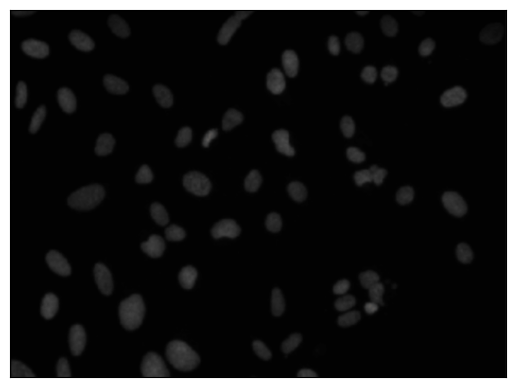

In [28]:
#To read the image   
bgrimg = cv2.imread(str(im_path))  
plt.imshow(bgrimg)  
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis  
plt.yticks([])  
print('Original Image Shape',bgrimg.shape) 

In [29]:
#To see the structure of the image, let's display one row of the image matrix  
print('The first row of the image matrix contains',len(bgrimg[1]),'pixels')  
print(bgrimg[1])  

The first row of the image matrix contains 660 pixels
[[35 35 35]
 [15 15 15]
 [19 19 19]
 ...
 [ 2  2  2]
 [ 2  2  2]
 [15 15 15]]


In [30]:
#To transform the colourspace from BGR to grayscale so as to make things simpler  
grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)  

New Image Shape (489, 660)


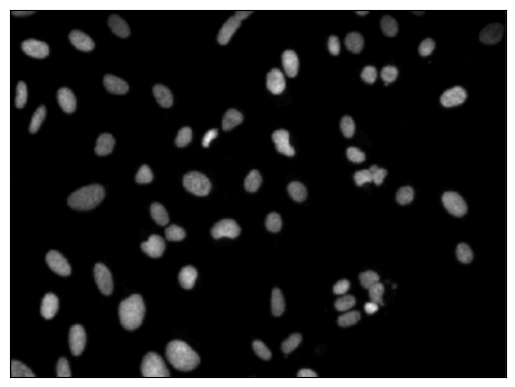

In [31]:
#To plot the image  
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images  
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis  
plt.yticks([])  
print('New Image Shape',grayimg.shape)  

In [32]:
#To understand this further, let's display one entire row of the image matrix  
print('The first row of the image matrix contains',len(grayimg[1]),'pixels')  
print(grayimg[1])  

The first row of the image matrix contains 660 pixels
[35 15 19 24 25 25 27 28 29 30 30 30 31 31 31 30 28 27 25 25 25 25 25 26
 25 23 24 26 26 25 23 23 23 22 20 15 11  8  5  3  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  3  6 11 18 23 23 24 25 25 27 28 27 25 

Text(0.5, 1.0, 'Distribution of intensity values (Zoomed In)')

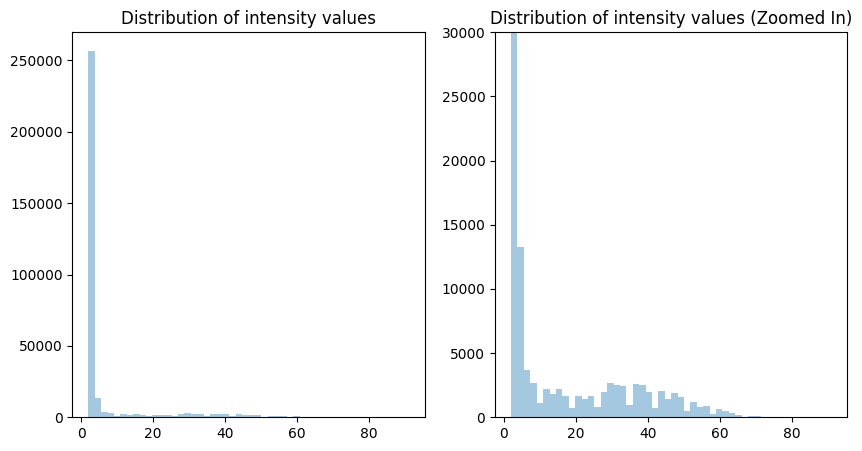

In [33]:
#Okay, let's look at the distribution of the intensity values of all the pixels  
plt.figure(figsize=(10,5))  
  
plt.subplot(1,2,1)  
sns.distplot(grayimg.flatten(),kde=False)#This is to flatten the matrix and put the intensity values of all the pixels in one single row vector  
plt.title('Distribution of intensity values')  
  
#To zoom in on the distribution and see if there is more than one prominent peak   
plt.subplot(1,2,2)  
sns.distplot(grayimg.flatten(),kde=False)   
plt.ylim(0,30000)   
plt.title('Distribution of intensity values (Zoomed In)')

In [35]:
from skimage.filters import threshold_otsu  
thresh_val = threshold_otsu(grayimg)  
print('The optimal seperation value is',thresh_val)  

The optimal seperation value is 20


Text(0.5, 1.0, 'Original Image')

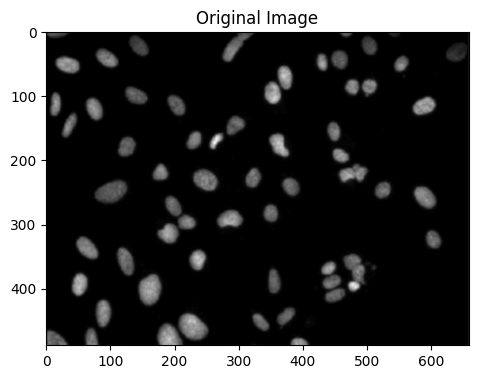

In [36]:
mask=np.where(grayimg>thresh_val,1,0)  
  
#To plot the original image and mask side by side  
plt.figure(figsize=(12,6))  
plt.subplot(1,2,1)  
plt.imshow(grayimg,cmap='gray')  
plt.title('Original Image')  

Text(0.5, 1.0, 'Mask')

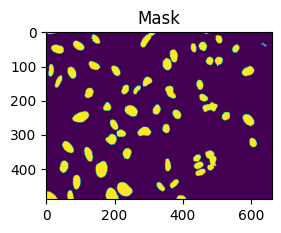

In [37]:
plt.subplot(1,2,2)  
maskimg = mask.copy()  
plt.imshow(maskimg, cmap='viridis')  
plt.title('Mask')  

ValueError: cannot reshape array of size 322740 into shape (520,696)

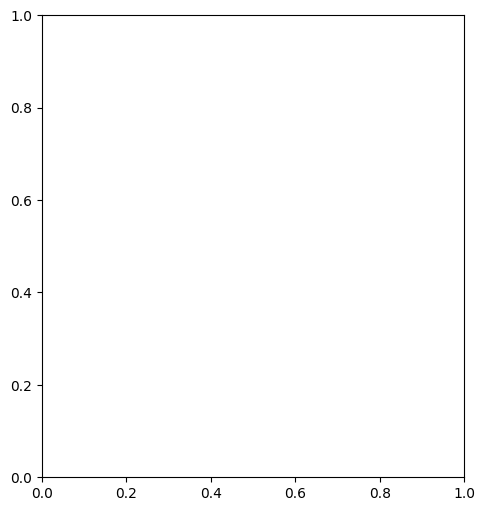

In [38]:
#Let's see if K-Means does a good job on this data   
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=2) #2 as we're still trying to separate the lighter coloured nuclei from the darker coloured background   
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))  
  
plt.figure(figsize=(12,6))  
plt.subplot(1,2,1)  
plt.imshow(kmeans.labels_.reshape(520,696),cmap='magma')  
plt.title('K-Means')  
  
plt.subplot(1,2,2)  
plt.imshow(maskimg, cmap='viridis')  
plt.title('Mask with Otsu Seperation') 